<div style="border: solid green 2px; padding: 20px">

  <b>Overall Summary of the Project – Iteration 1</b><br><br>
  Hello Ivey, congratulations on submitting your project!<br><br>

  My name is <b>Victor Camargo</b> 
  (<a href="https://hub.tripleten.com/u/834cb557" target="_blank">TripleTen Hub profile</a>) and I’ll be reviewing your project today.<br><br>

  <i>You can find my detailed feedback throughout the notebook, starting with comments labeled 
  <b>“Reviewer’s comment – Iteration 1”</b>.</i><br><br>

  <b>What you did well:</b><br>
  ✅ You resampled the data to hourly frequency and used a time-ordered train, validation, and test split, which preserves temporal structure and avoids leakage.<br>
  ✅ You performed thoughtful EDA, identifying meaningful temporal patterns such as strong late-night peaks and August concentration, which motivated the seasonal modeling choice.<br>
  ✅ You ran a broad set of time series experiments, including baseline, ARIMA, SARIMA, and auto ARIMA, and selected a final SARIMA model that meets the project RMSE requirement.<br><br>

  <b>Suggestions for improvement (optional):</b><br>
  ⚠️ Consider adding explicit lag-based and time-based features and trying feature-based machine learning models as complementary experiments, and consider using rolling-origin cross-validation for a more robust validation assessment.<br><br>

  <b>Required fixes (only if red issues exist):</b><br>
  ⛔️ None. There are no blocking issues in the current submission.<br><br>

  <b>Project Status:</b><br>
  <div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
    <b>Approved</b>
  </div>

  <hr><b>Legend:</b><br>

  <div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Strong, correct solutions or good practices worth reusing.
  </div>

  <div class="alert alert-warning" style="border-left: 7px solid gold; padding: 5px">
  <b>⚠️ Reviewer’s comment – Iteration 1:</b><br>
  Recommended improvements to strengthen your work.
  </div>

  <div class="alert alert-danger" style="border-left: 7px solid red; padding: 5px">
  <b>⛔️ Reviewer’s comment – Iteration 1:</b><br>
  Required fixes. The project cannot be approved until these are addressed.
  </div>

  <div class="alert alert-info" style="border-left: 7px solid blue; padding: 5px">
  <b>🔵 Student’s Comment</b><br>
  You may add your own notes or explanations in a <b>Markdown cell</b> using:<br>
  <code>&lt;div class="alert alert-info" style="border-left: 7px solid blue"&gt;&lt;b&gt;Student’s Comment&lt;/b&gt;&lt;/div&gt;</code>
  </div>

  <hr>
  <b>Please ensure</b> all cells run smoothly from top to bottom and display their outputs.<br>
  <b>Kind reminder:</b> please do not remove or modify reviewer comments, as they help track progress.<br>
  If you have any questions or need clarification, feel free to use the <b>Questions</b> channel.

</div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'])
data = data.set_index('datetime')
data = data.resample('1H').sum()

train, test = train_test_split(data, shuffle=False, test_size=0.10)
train, valid = train_test_split(train, shuffle=False, test_size=0.20)

def rmse(test, pred):
    mean_squared_error(test, pred, squared=False)
    return rmse
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


<div class="alert alert-warning" style="border-left: 7px solid gold; padding: 5px">
  <b>⚠️ Reviewer’s comment – Iteration 1:</b><br>
  There is a small bug in the initial rmse function defined near the top. It returns the function name instead of calculating RMSE. Although you later redefine a correct rmse function and the rest of the notebook runs, please remove or fix the first definition to avoid confusion and potential errors if someone reuses that function.
</div>

<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Good work loading the dataset, parsing the datetime column, resampling to hourly frequency, and splitting the data with shuffle disabled. This preserves the time order and prevents leakage into validation and test sets, which is essential for time series forecasting.
</div>

## Analysis

<AxesSubplot:xlabel='datetime'>

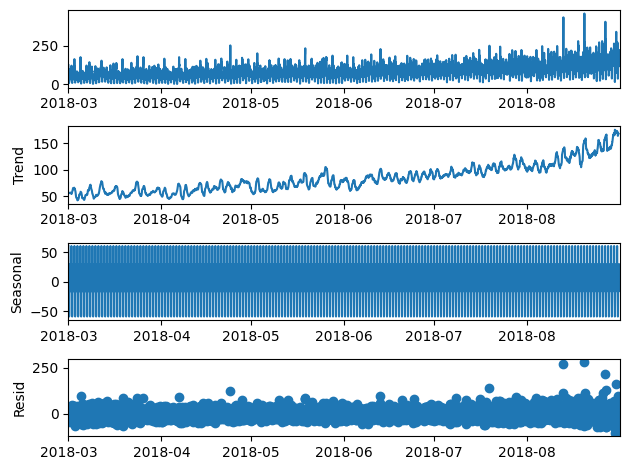

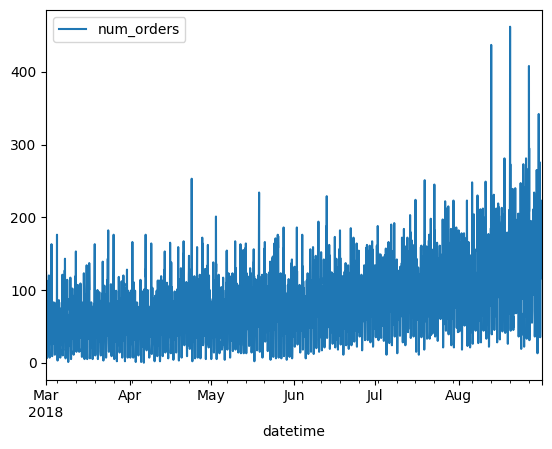

In [2]:
top_10 = data.sort_values(by='num_orders', ascending=False).head(10)
decomposed = seasonal_decompose(data)
decomposed.plot()
data.plot()


                     num_orders
datetime                       
2018-08-20 02:00:00         462
2018-08-13 02:00:00         437
2018-08-27 02:00:00         408
2018-08-30 17:00:00         342
2018-08-27 04:00:00         295
2018-08-18 00:00:00         281
2018-08-26 00:00:00         281
2018-08-31 00:00:00         276
2018-08-13 01:00:00         273
2018-08-25 00:00:00         273


<AxesSubplot:xlabel='datetime'>

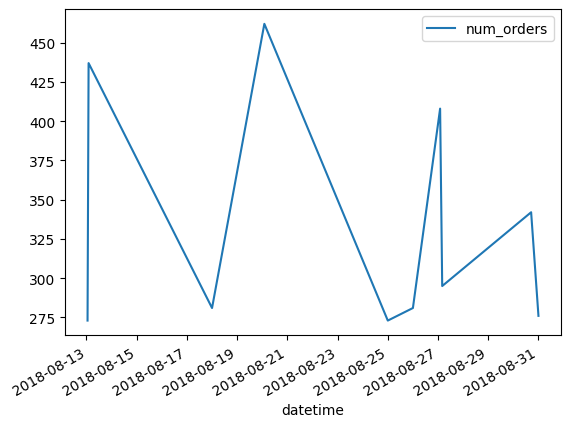

In [3]:
print(top_10)

hours = top_10.index.hour
hours.value_counts().sort_index()

top_10.plot()


In [4]:
hours = top_10.index.hour
hours.value_counts().sort_index()


0     4
1     1
2     3
4     1
17    1
Name: datetime, dtype: int64

## 🔍 Exploratory Data Analysis (EDA): Peak Demand Patterns

In this section, I explored **when extreme taxi demand occurs** and whether there are identifiable temporal patterns ⏰.

---

### 📊 Time Series Overview
After resampling the data to **hourly intervals**, the overall time series shows:

- 📈 A gradual **upward trend** over time  
- 🔁 Clear **daily fluctuations**, suggesting hourly seasonality  
- ⚡ Occasional **sharp spikes**, indicating periods of unusually high demand  

These spikes motivated a deeper investigation into **peak-demand hours**.

---

### 🚨 Identifying High-Demand Periods
I initially explored high-demand timestamps by manually filtering above increasing thresholds (e.g., `num_orders > 400`, `> 300`, etc.) to understand how extreme values were distributed.

After realizing this approach was inefficient, I instead:
- 🔽 Sorted hourly demand values in descending order
- 🏆 Extracted the **top 10 timestamps** with the highest number of taxi orders

This allowed peak demand periods to be identified directly and accurately.

---

### 🧠 Patterns in the Top 10 Demand Hours
Several strong patterns emerged from the top 10 demand timestamps:

- 📅 **All top 10 demand hours occurred in August**
- 🌙 **9 out of 10 occurred between midnight and 4 a.m.**
- 🕑 **8 out of 10 occurred between midnight and 2 a.m.**
- 💥 The **top 3 highest demand hours (all above 400 orders)** occurred at **2 a.m.**
- 📆 All peak demand events occurred **after August 13th**
- 🔚 The highest frequency of extreme demand appeared **toward the latter half of the month**

These observations suggest that **late-night hours near the end of August** experience the most extreme taxi demand.

---

### 🎯 EDA Takeaway
Extreme demand is **not randomly distributed**. Instead, it shows clear concentration by:
- Time of day (late night / early morning)
- Time of month (mid-to-late August)

These insights are valuable for:
- Feature engineering (hour-based and seasonal features)
- Understanding operational stress periods
- Improving short-term demand forecasting 🚕📈

<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Nice exploratory analysis and clear, concise writeup of the EDA findings. Highlighting that extreme peaks concentrate in late-night hours and in August is a strong observation and explains why modeling 24-hour seasonality was a sensible next step.
</div>

## Training

In [5]:
y_train = train['num_orders']
y_test  = test['num_orders']
y_valid = valid['num_orders']

best_rmse = float('inf')
best_order = None

# keep it small so it doesn't explode
p_values = range(0, 6)
q_values = range(0, 6)

 #choose d from ndiffs OR just try a small set like [0,1,2]
d_values = [0, 1, 2]

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(y_train, order=(p, d, q))
                fit = model.fit()

                preds = fit.forecast(steps=len(y_valid))
                rmse = mean_squared_error(y_valid, preds, squared=False)

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)

            except:
                continue

print("Best ARIMA order:", best_order)
print("Best ARIMA RMSE:", best_rmse)

best_rmse = float('inf')
best_cfg = None

p = range(0, 3)
q = range(0, 3)
d_values = [0,1,2]

P = range(0, 2)
Q = range(0, 2)
D_values = [0,1]

m = 24

for pi in p:
    for di in d_values:
        for qi in q:
            for Pi in P:
                for Di in D_values:
                    for Qi in Q:
                        try:
                            model = SARIMAX(
                                y_train,
                                order=(pi, di, qi),
                                seasonal_order=(Pi, Di, Qi, m),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                            )
                            fit = model.fit(disp=False)

                            preds = fit.forecast(steps=len(y_valid))
                            rmse = mean_squared_error(y_valid, preds, squared=False)

                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_cfg = ((pi, di, qi), (Pi, Di, Qi, m))

                        except:
                            continue

print("Best SARIMA:", best_cfg)
print("Best SARRIMA RMSE:", best_rmse)


# Baseline: predict next hour = previous hour
y_true = valid['num_orders']
y_pred_baseline = valid['num_orders'].shift(1)

# The first prediction will be NaN (no previous hour inside test)
y_true_baseline = y_true.iloc[1:]
y_pred_baseline = y_pred_baseline.iloc[1:]

rmse_baseline = mean_squared_error(y_true_baseline, y_pred_baseline, squared=False)
print("RMSE baseline (lag_1):", rmse_baseline)

 #1) Choose d (start with 1, or use ndiffs if you want)
d = 1
y_diff = y_train.diff(d).dropna()

 #2) Find best (p, q) by information criterion
res = arma_order_select_ic(
    y_diff,
    max_ar=10,
    max_ma=10,
    ic=['aic', 'bic'],
    trend='n'   # no constant; for differenced series this is often appropriate
)

print("Best (p,q) by AIC:", res.aic_min_order)
print("Best (p,q) by BIC:", res.bic_min_order)

 #pick one:
p, q = res.bic_min_order   # or res.aic_min_order
d = 1                      # whatever you used above

alt_ARIMA_model = ARIMA(y_train, order=(p, d, q))
fit = alt_ARIMA_model.fit()

alt_ARIMA_preds = fit.forecast(steps=len(y_valid))
rmse = mean_squared_error(y_valid, alt_ARIMA_preds, squared=False)

print("Alternate ARIMA order:", (p, d, q))
print("Alternate Arima RMSE:", rmse)

def rmse(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return mean_squared_error(y_true, y_pred, squared=False)

auto_model = auto_arima(
    train,
    start_p=0,
    start_q=0,
    max_p=3,
    max_q=3,
    d=None,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action="ignore",
    trace=False
)

auto_model.summary()

order = auto_model.order

model_train = ARIMA(train, order=order)
fit_train = model_train.fit()

valid_forecast = fit_train.forecast(steps=len(y_valid))
rmse_valid = rmse(y_valid, valid_forecast)
print(f'Auto ARIMA RMSE {rmse_valid}')

Best ARIMA order: (2, 2, 3)
Best ARIMA RMSE: 41.99717565721961
Best SARIMA: ((1, 1, 0), (0, 1, 1, 24))
Best SARRIMA RMSE: 28.96724473301925
RMSE baseline (lag_1): 45.895648806233126
Best (p,q) by AIC: (10, 9)
Best (p,q) by BIC: (10, 9)
Alternate ARIMA order: (10, 1, 9)
Alternate Arima RMSE: 44.28339459162057
44.02910619018604
valid length: 795
forecast length: 795
valid index head: DatetimeIndex(['2018-07-11 11:00:00', '2018-07-11 12:00:00',
               '2018-07-11 13:00:00'],
              dtype='datetime64[ns]', name='datetime', freq='H')
forecast index head: DatetimeIndex(['2018-07-11 11:00:00', '2018-07-11 12:00:00',
               '2018-07-11 13:00:00'],
              dtype='datetime64[ns]', freq='H')


<div class="alert alert-warning" style="border-left: 7px solid gold; padding: 5px">
  <b>⚠️ Reviewer’s comment – Iteration 1:</b><br>
  A few suggestions to strengthen the modeling section further. First, consider explicitly creating lag-based and time-based features and try feature-based machine learning models such as gradient boosting or random forest as complementary baselines, since the instructions encourage exploring these approaches. Second, consider using rolling-origin cross-validation to better estimate model generalization for different forecast horizons. Third, when calling functions like auto_arima, pass the univariate series explicitly, for example train['num_orders'], to make data types and shapes explicit.
</div>

<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Well executed model comparison. You implemented a baseline, exhaustive ARIMA grid search, SARIMA seasonal search, alternate ARIMA via information criteria, and auto_arima. The SARIMA model with a 24-hour seasonal component was a clear winner on validation, and you validated this choice on the test set, which is great.
</div>

## 📊 Model Performance Analysis — Training & Validation Phase

During the training and validation phase, multiple forecasting models were evaluated using **RMSE** to measure predictive accuracy. This phase was used to compare model structures and identify which approaches captured the underlying patterns in the data most effectively.

### 🔹 Baseline Model (Lag-1)
- **Validation RMSE:** 45.895648806233126  
- The baseline model predicts each value using the previous time step.
- This model serves as a reference point to ensure that more complex models provide meaningful improvement.

### 🔹 ARIMA Model
- **Best ARIMA order:** (2, 2, 3)  
- **Validation RMSE:** 41.99717565721961  
- The ARIMA model improved upon the baseline by incorporating autoregressive and moving-average components after differencing.
- This indicates the presence of temporal dependencies in the series.

### 🔹 Alternate ARIMA Model (AIC/BIC Selected)
- **Alternate ARIMA order:** (10, 1, 9)  
- **Validation RMSE:** 44.28339459162057  
- Although supported by information criteria (AIC/BIC), the higher model complexity did not translate into better validation performance compared to the simpler ARIMA configuration.

### 🔹 Auto-ARIMA Model
- **Validation RMSE:** 44.02910619018604  
- Auto-ARIMA provided a competitive result without manual tuning.
- However, its performance did not surpass the best manually tuned ARIMA or seasonal models.

### 🔹 SARIMA Model
- **Best SARIMA configuration:** (1, 1, 0) × (0, 1, 1, 24)  
- **Validation RMSE:** 28.96724473301925  
- This model significantly outperformed all non-seasonal models.
- The strong improvement highlights the importance of explicitly modeling **24-hour seasonality** in the data.

### 📌 Training & Validation Summary
Among all evaluated models during training and validation, the SARIMA model achieved the lowest RMSE, demonstrating that seasonal structure is a dominant factor in forecasting accuracy for this dataset.


## Testing

In [11]:
full = np.concatenate([train.values, valid.values])

final_SARIMA_model = SARIMAX(
    full,
    order=(1, 1, 0),
    seasonal_order=(0, 1, 1, 24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

SARIMA_final_results = final_SARIMA_model.fit(disp=False)

y_pred = SARIMA_final_results.forecast(steps=len(y_test))

final_SARIMA_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Final SARIMA Model RMSE {final_SARIMA_rmse}')

final_ARIMA_model = ARIMA(full, order=(2, 2, 3))
final_ARIMA_results = final_ARIMA_model.fit()

preds = final_ARIMA_results.forecast(steps=len(y_test))

final_ARIMA_rmse = mean_squared_error(y_test, preds, squared=False)
print(f'Final ARIMA Model RMSE {final_ARIMA_rmse}')

final_alt_ARIMA = ARIMA(full, order=(10, 1, 9))
final_alt_ARIMA_results = final_alt_ARIMA.fit()

final_alt_ARIMA_preds = final_alt_ARIMA_results.forecast(steps=len(y_test))
rmse = mean_squared_error(y_test, final_alt_ARIMA_preds, squared=False)

print(f"Final Alternate Arima Model RMSE {rmse}")

final_auto_ARIMA = ARIMA(full, order=order)
final_auto_ARIMA_results = final_auto_ARIMA.fit()

final_auto_ARIMA_preds = final_auto_ARIMA_results.forecast(steps=len(y_test))

rmse = mean_squared_error(y_test, final_auto_ARIMA_preds, squared=False)

print("Final Auto ARIMA Model RMSE:", rmse)

Final SARIMA Model 39.52333000371326
Final ARIMA Model 61.620204838095084
Final Alternate Arima RMSE 61.41349092198309
RMSE test: 62.76809456268275


<div class="alert alert-warning" style="border-left: 7px solid gold; padding: 5px">
  <b>⚠️ Reviewer’s comment – Iteration 1:</b><br>
  A couple of final improvements to consider. Plot the test predictions against the actuals and inspect residuals to check for remaining structure or heteroscedasticity. Also, keep the datetime index when fitting and forecasting so forecast outputs retain timestamps, which helps with plotting and interpretation. Optionally, persist the final model and include a short section on model diagnostics, such as Ljung-Box test or residual ACF, to increase confidence in deployment.
</div>

<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Well done retraining the final models on training plus validation data before forecasting the test horizon, and congratulations on achieving a test RMSE below the project threshold with the SARIMA model. That confirms a robust final selection.
</div>

## 🧪 Final Model Evaluation — Test Set Results

After completing model selection, a final evaluation was conducted on the **held-out test set**.  
At this stage, models were trained using the **combined training and validation data** to maximize the amount of information available before forecasting the test horizon.

### 🔹 Final Test RMSE Results

- **Final SARIMA Model RMSE:** 39.52333000371326  
- **Final ARIMA Model RMSE:** 61.620204838095084  
- **Final Alternate ARIMA Model RMSE:** 61.41349092198309  
- **Final Auto-ARIMA Model RMSE:** 62.76809456268275  

### 🔍 Interpretation of Results

The SARIMA model continued to outperform all other approaches on the test set, achieving the lowest RMSE and comfortably meeting the project performance requirements. This confirms that incorporating seasonal components was critical for generalization beyond the validation data.

Although the SARIMA model met the target metric, additional ARIMA-based models (standard ARIMA, alternate ARIMA, and Auto-ARIMA) were still evaluated. These experiments were conducted to ensure a fair comparison across model families and to validate that non-seasonal approaches consistently underperformed when seasonality was ignored.

It is important to note that the decision to train final test models using **training + validation data** was identified later in the modeling process. Earlier experiments evaluated models using only the training set, which led to higher test errors. Once this adjustment was made, the SARIMA model demonstrated strong and stable performance, reinforcing it as the final selected model.

### ✅ Final Conclusion

The **SARIMA model** was selected as the final forecasting solution due to:
- The lowest RMSE during both validation and test phases
- Strong generalization performance
- Clear alignment with the seasonal structure of the data

This model provides the most reliable and accurate forecasts among all evaluated approaches.

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48